# Forecasting of Home Sales - Time Series

Using machine learning on MLS (Multiple Listing Services) data to accurately predict real estate volume of Santa Monica and Greater Los Angeles Area

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from epiweeks import Week
from statsmodels.tools.eval_measures import rmse
# from src.housing_scripts import *
from src.time_scripts import *

pd.options.display.max_columns = None
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
pd.plotting.register_matplotlib_converters()

In [4]:
from pylab import rcParams
rcParams['figure.figsize']=12,5

## READ CSV INTO DATAFRAME

In [5]:
master=pd.read_csv('data/clean_master.csv',header=0, index_col=0)

## IMPORT PROPHET

In [6]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from src.time_scripts import *

Separate into property type and city subsets

In [7]:
master, sfr_master, condo_master, town_master, sm_data, bh_data, sl_data = forecasting_datasets_setup(master) 

## Split into Weeks
+ split into weekly unit closed count
+ split into different cities

## Data is formatted for modeling

In [8]:
# data by city
sm_count_weekly_data=week_split_count(sm_data)
bh_count_weekly_data=week_split_count(bh_data)
sl_count_weekly_data=week_split_count(sl_data)

In [9]:
# data is compared at different time increments
# master_day_data=day_split_count(master)
# sfr_day_data=day_split_count(sfr_master)
# condo_day_data=day_split_count(condo_master)

master_week_data=week_split_count(master)
sfr_week_data=week_split_count(sfr_master)
condo_week_data=week_split_count(condo_master)

# master_month_data=time_series_sale_count(master)
# sfr_month_data=time_series_sale_count(sfr_master)
# condo_month_data=time_series_sale_count(condo_master)


# Implement Facebook Prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


''

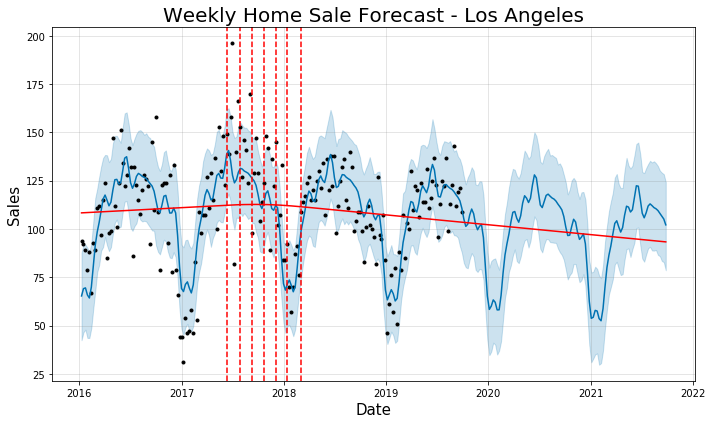

In [10]:
master_model=Prophet()
master_model.fit(master_week_data)
master_future = master_model.make_future_dataframe(periods=104,freq='W')
master_forecast = master_model.predict(master_future)
fig = master_model.plot(master_forecast)
a = add_changepoints_to_plot(fig.gca(),master_model,master_forecast)
plt.title('Weekly Home Sale Forecast - Los Angeles',size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Sales',size=15)
plt.savefig('pictures/house_sale_forecast.png')
plt.tight_layout()
;

## Out of the box forecasting model

''

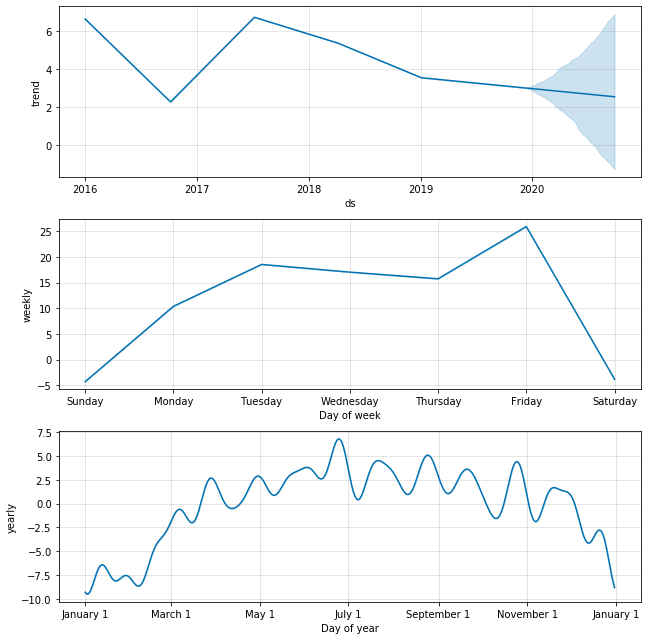

In [11]:
## These are the parameters that are tuned for better performance
master_model=Prophet(
    growth='linear',
    n_changepoints=4,
    changepoint_range=0.8,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive',
    seasonality_prior_scale=20,
    changepoint_prior_scale=.5,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    ).add_seasonality(
        name='weekly',
        period=7,
        fourier_order=20
    ).add_seasonality(
        name='yearly',
        period=365.25,
        fourier_order=20)
master_model.fit(master_day_data)
master_future = master_model.make_future_dataframe(periods=365)
master_forecast = master_model.predict(master_future)
master_model.plot_components(master_forecast)
plt.savefig('pictures/plot_components_daily.png')
;

Test the model by splitting it and comparing the prediction to data the model has not seen yet.

In [12]:
master_week_data.shape[0] # check size of dataframe

195

## Use naive forecasting as baseline prediction

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE = 0.07906530780734297
RMSE = 11.60555551347727
MEAN = 110.07179487179488
BASELINE MAPE = 0.08465530820471644
BASELINE RMSE = 11.341005191285292


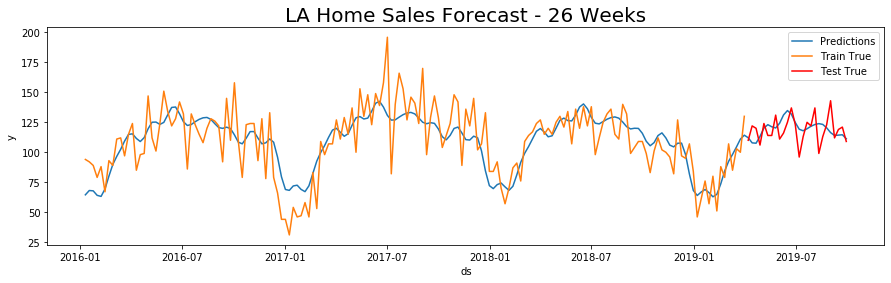

In [13]:
split=169 
freq='W'
train_test_split_weekly_analysis(master_week_data,split,freq)
plt.title('LA Home Sales Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/LA_volume.png');

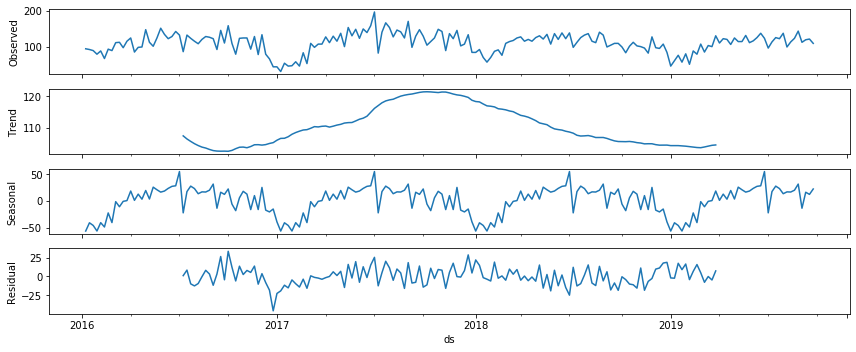

In [14]:
plot_decompose(master_week_data)

## Analyze residence type: SFR
+ fitting the model and looking at SFR property types specifically 

MAPE = 0.10044227462121245
RMSE = 10.025888001406152
MEAN = 76.75897435897436
BASELINE MAPE = 0.10537825688744452
BASELINE RMSE = 9.619747673191638


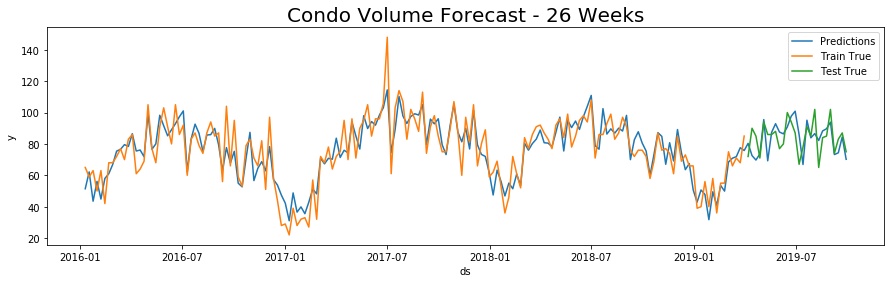

In [15]:
changepoints=48
split=169
freq='W'


prophet_analysis(sfr_week_data,split,freq,changepoints)
plt.title('Condo Volume Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/sfr_volume.png');

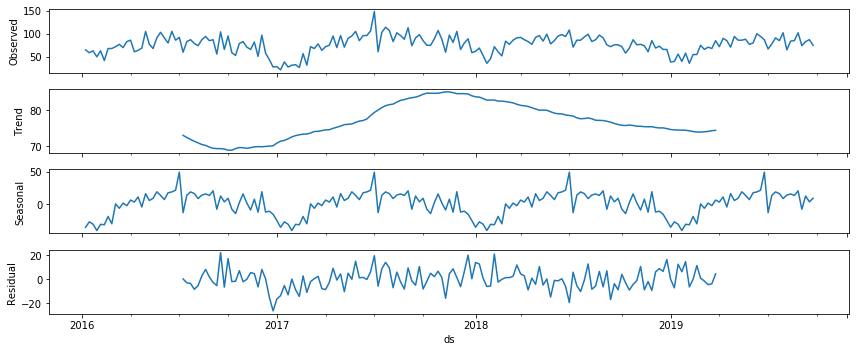

In [16]:
plot_decompose(sfr_week_data)

## Analyze residence type: Condo

MAPE = 0.15564130314234667
RMSE = 5.714365904915073
MEAN = 27.933333333333334
BASELINE MAPE = 0.21167384390946667
BASELINE RMSE = 5.387617595682703


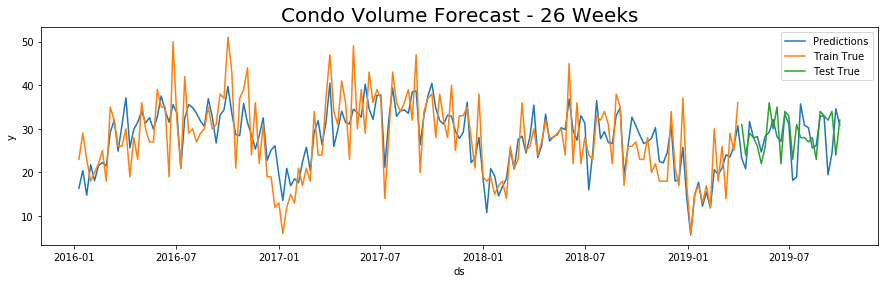

In [17]:
changepoints=48
split=169
freq='W'


prophet_analysis(condo_week_data,split,freq,changepoints)
plt.savefig('pictures/condo_weekly_split.png')
plt.title('Condo Volume Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/condo_volume.png');

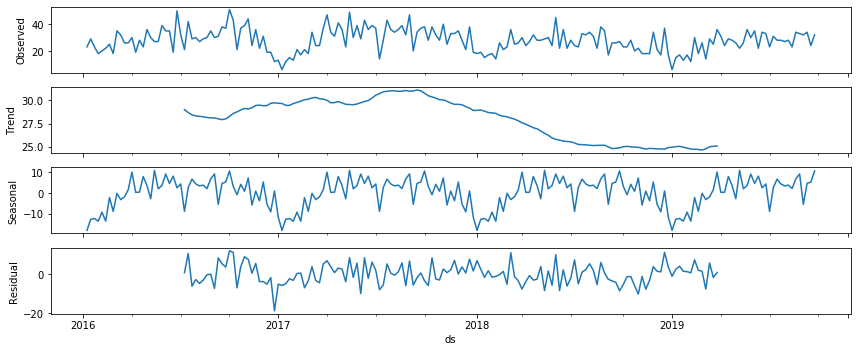

In [18]:
plot_decompose(condo_week_data)

## Weekly average sale price (CITIES)
+ normalize target

In [19]:
sm_week_split_avg_close_price = week_split_avg_close_price(sm_data)
bh_week_split_avg_close_price = week_split_avg_close_price(bh_data)
sl_week_split_avg_close_price = week_split_avg_close_price(sl_data)

## Weekly average sale COUNT (CITIES)

In [20]:
sm_week_split_count = week_split_count_close_price(sm_data)
bh_week_split_count = week_split_count_close_price(bh_data)
sl_week_split_count = week_split_count_close_price(sl_data)

## Examining and forecasting weekly avg sale price by city

## SilverLake AVG Sale Price Trend

MAPE = 0.012735910760759344
RMSE = 0.22657983684613145
MEAN = 14.094330514013713
BASELINE MAPE = 0.01434768493151061
BASELINE RMSE = 0.21597086126722936


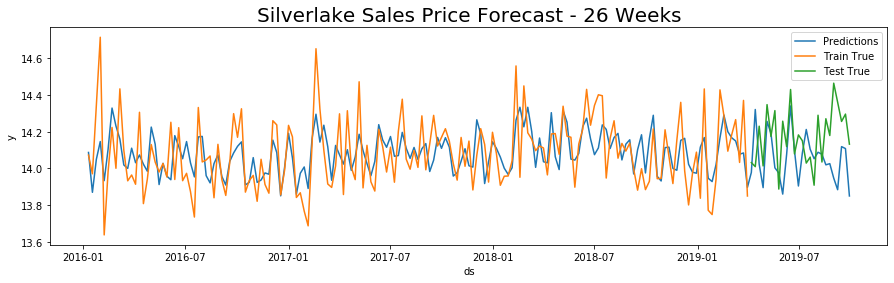

In [21]:
split=169
freq='W'
# plot_compare(sm_count_weekly_data,bh_count_weekly_data,sl_count_weekly_data,freq)
prophet_analysis_type(sl_week_split_avg_close_price,split,freq)
plt.title('Silverlake Sales Price Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/sl_price.png');

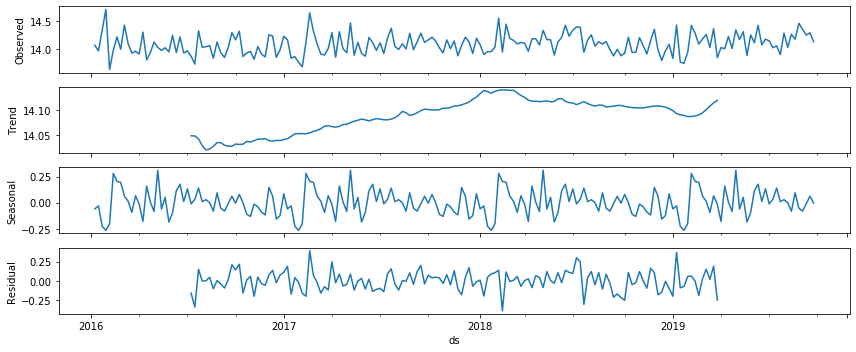

In [22]:
plot_decompose(sl_week_split_avg_close_price)

## Silverlake Sales Count

MAPE = 0.058361420208996664
RMSE = 0.23969735298130562
MEAN = 3.087161709677514
BASELINE MAPE = 0.05358564280595632
BASELINE RMSE = 0.2944806182322761


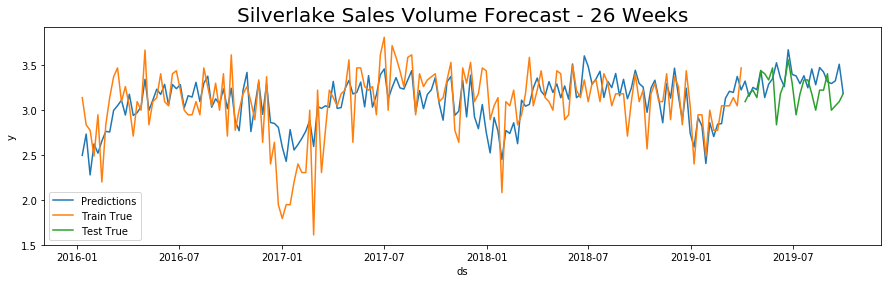

In [23]:
split=169
freq='W'
prophet_analysis_type(sl_week_split_count,split,freq)
plt.title('Silverlake Sales Volume Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/sl_volume.png');

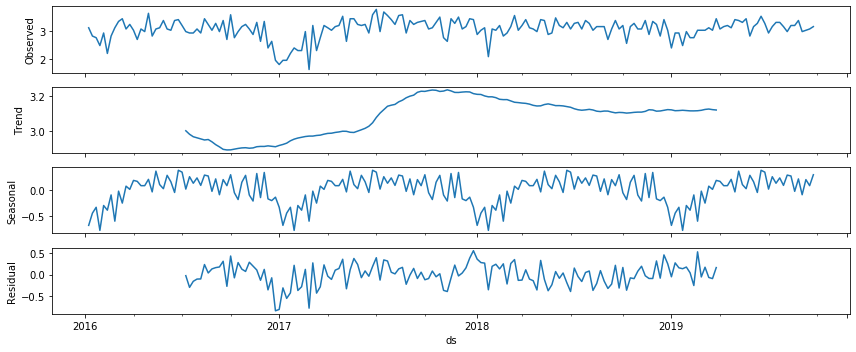

In [24]:
plot_decompose(sl_week_split_count)

## Santa Monica AVG Sale Price Trend

MAPE = 0.022669513293370063
RMSE = 0.4066557375103796
MEAN = 14.4601960075469
BASELINE MAPE = 0.02878226361545831
BASELINE RMSE = 0.3888130231440225


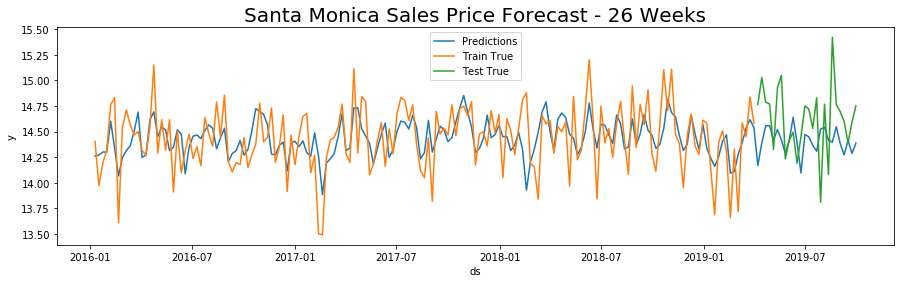

In [25]:
split=169
freq='W'
changepoints = 5
# plot_compare(sm_count_weekly_data,bh_count_weekly_data,sl_count_weekly_data,freq)
prophet_analysis_type(sm_week_split_avg_close_price,split,freq)
plt.title('Santa Monica Sales Price Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/sm_price.png');

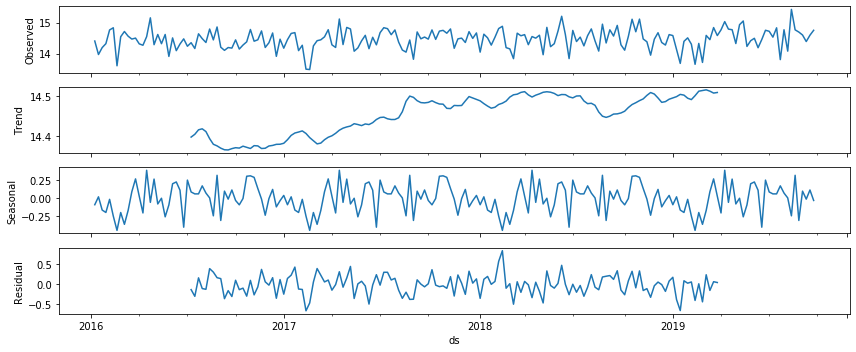

In [26]:
plot_decompose(sm_week_split_avg_close_price)

## Santa Monica Sales Count

MAPE = 0.2516613891921447
RMSE = 0.44542631796521165
MEAN = 1.9824441914657622
BASELINE MAPE = 0.34400535464419796
BASELINE RMSE = 0.5387482723502146


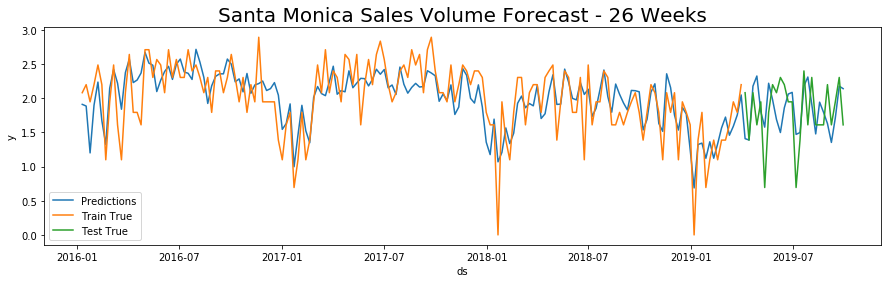

In [27]:
split=169
freq='W'
prophet_analysis_type(sm_week_split_count,split,freq)
plt.title('Santa Monica Sales Volume Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/sm_volume.png');

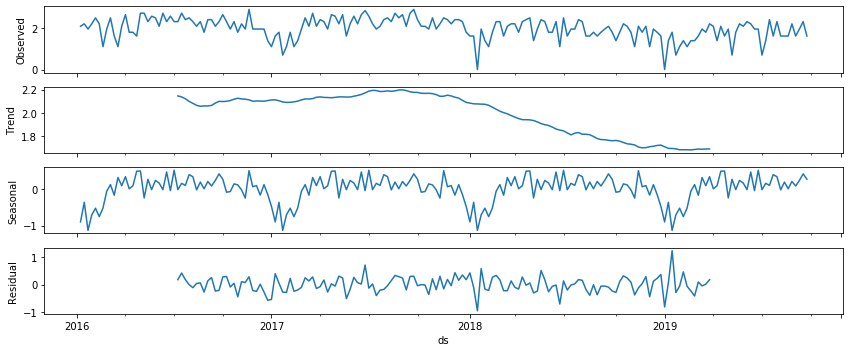

In [28]:
plot_decompose(sm_week_split_count)

## Mid-Wilshire AVG Sale Price Trend

MAPE = 0.010146896162224698
RMSE = 0.1759347434309027
MEAN = 14.587976295686357
BASELINE MAPE = 0.01142278422134577
BASELINE RMSE = 0.16636838731714926


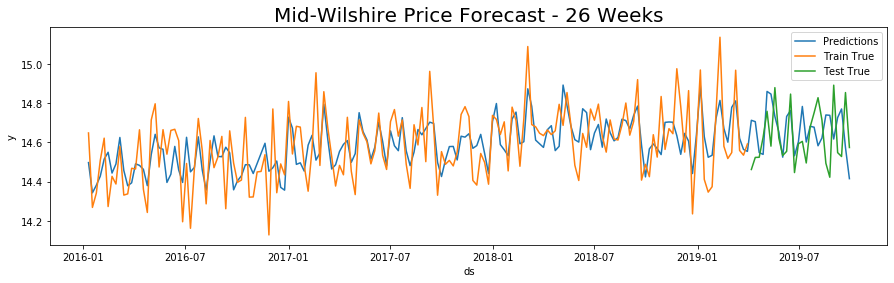

In [29]:
split=169
freq='W'
prophet_analysis_type(bh_week_split_avg_close_price,split,freq)
plt.title('Mid-Wilshire Price Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/wilshire_price.png');

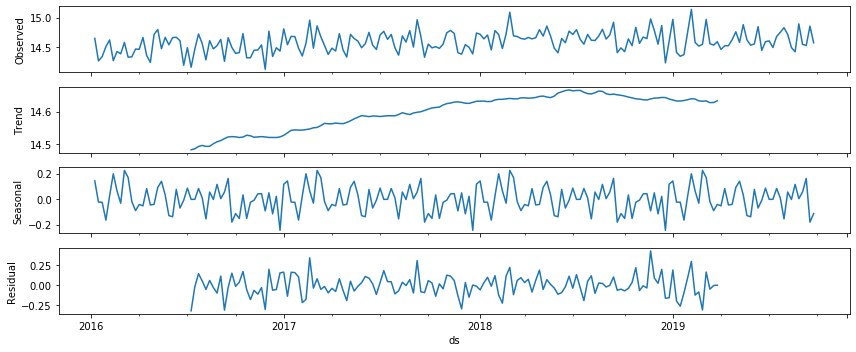

In [30]:
plot_decompose(bh_week_split_avg_close_price)

## Mid-Wilshire Sales Count

MAPE = 0.05257518023831331
RMSE = 0.22663588768811688
MEAN = 3.474587791386497
BASELINE MAPE = 0.06062991576110629
BASELINE RMSE = 0.2464518456740963


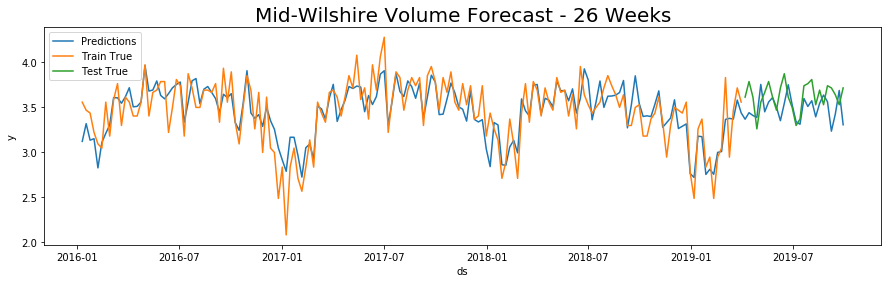

In [31]:
split=169
freq='W'
prophet_analysis_type(bh_week_split_count,split,freq)
plt.title('Mid-Wilshire Volume Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/wilshire_volume.png');

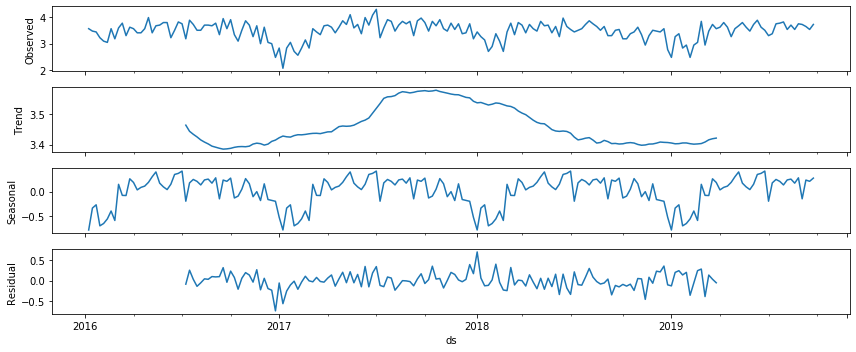

In [32]:
plot_decompose(bh_week_split_count)

## Compare behavior of each city's historical home price pattern

''

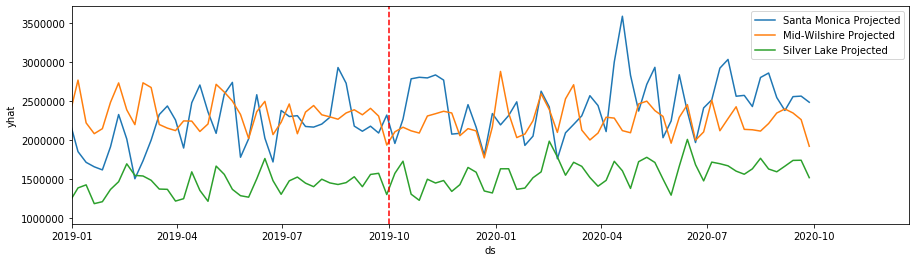

In [33]:
sm_week_split_avg_close_price = week_split_avg_close_price(sm_data)
bh_week_split_avg_close_price = week_split_avg_close_price(bh_data)
sl_week_split_avg_close_price = week_split_avg_close_price(sl_data)

split=169
freq='W'
plot_compare(sm_week_split_avg_close_price,bh_week_split_avg_close_price,sl_week_split_avg_close_price,freq)
plt.xlim(pd.to_datetime('2019-01-01'))
plt.axvline(pd.to_datetime('2019-10-01'),color='r',linestyle='--')
plt.savefig('pictures/price_forecast.png')
;

In [34]:
sm_future, bh_future, sl_future = give_forecast(sm_week_split_avg_close_price,bh_week_split_avg_close_price,sl_week_split_avg_close_price,freq)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


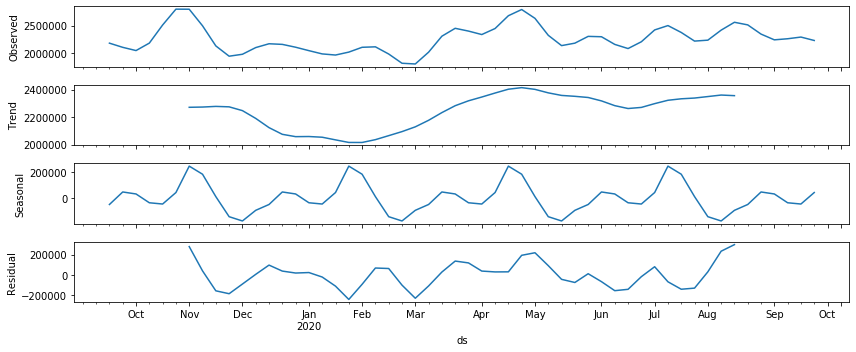

In [35]:
plot_future_decompose(sm_future)

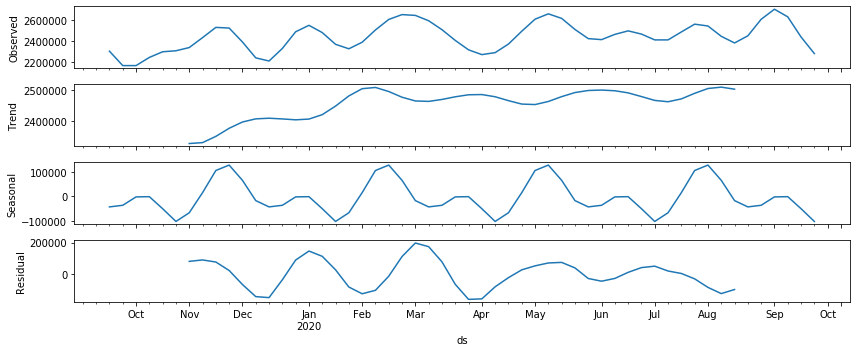

In [36]:
plot_future_decompose(bh_future)

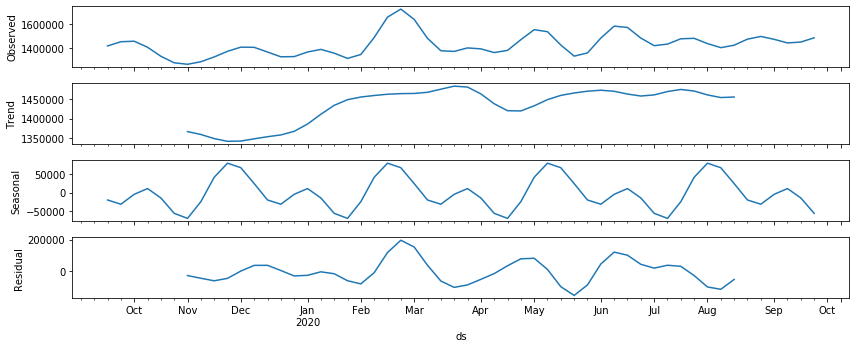

In [37]:
plot_future_decompose(sl_future)

''

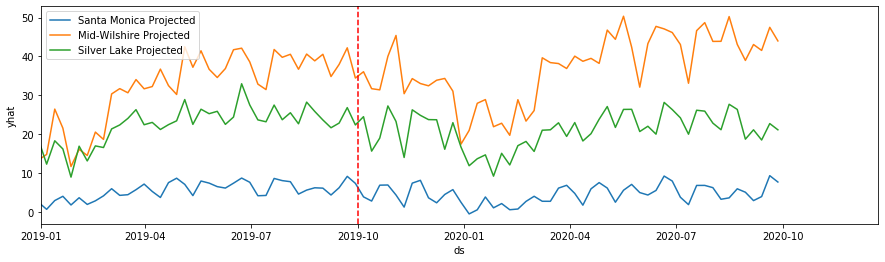

In [38]:
sm_week_split_count = week_split_count_close_price(sm_data)
bh_week_split_count = week_split_count_close_price(bh_data)
sl_week_split_count = week_split_count_close_price(sl_data)

split=169
freq='W'
plot_compare(sm_week_split_count,bh_week_split_count,sl_week_split_count,freq)
plt.xlim(pd.to_datetime('2019-01-01'))
plt.axvline(pd.to_datetime('2019-10-01'),color='r',linestyle='--')
plt.savefig('pictures/count_forecast.png')
;

In [39]:
sm_future, bh_future, sl_future = give_forecast(sm_week_split_count,bh_week_split_count,sl_week_split_count,freq)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


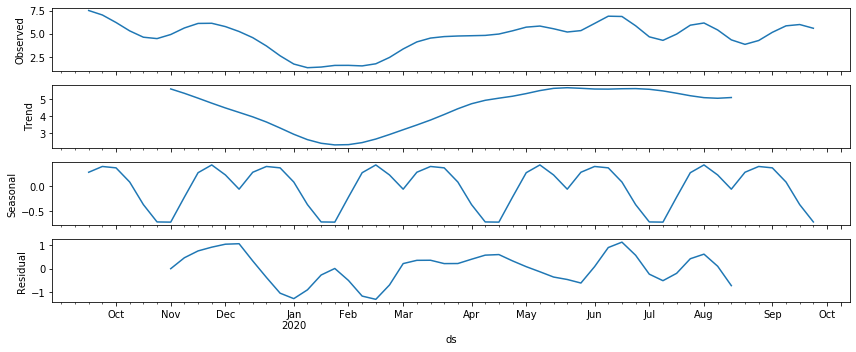

In [40]:
plot_future_decompose(sm_future)

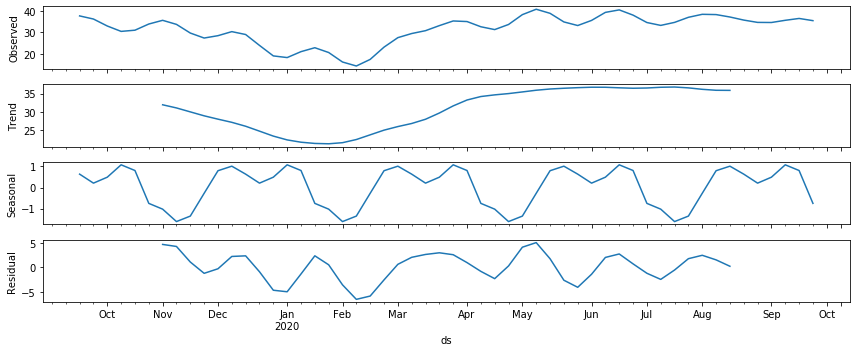

In [41]:
plot_future_decompose(bh_future)

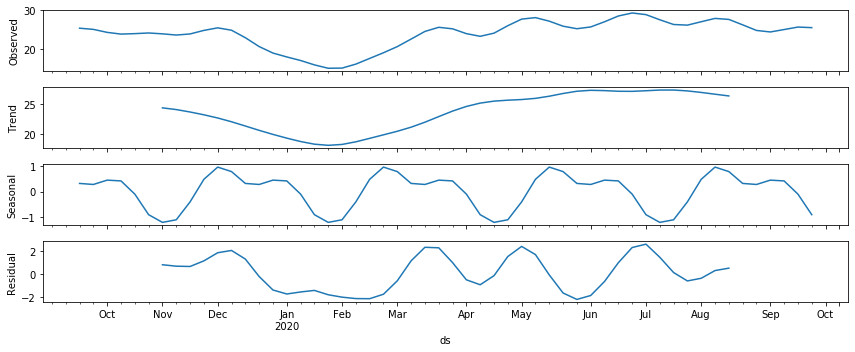

In [42]:
plot_future_decompose(sl_future)

In [45]:
bh_future.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
242,2020-08-30,30.959150,25.598410,43.798547,30.862106,31.052054,3.677965,3.677965,3.677965,3.677965,3.677965,3.677965,0.0,0.0,0.0,34.637115
243,2020-09-06,30.936582,25.707196,44.794444,30.836639,31.032051,3.652152,3.652152,3.652152,3.652152,3.652152,3.652152,0.0,0.0,0.0,34.588734
244,2020-09-13,30.914014,26.350068,44.416249,30.811210,31.010943,4.690400,4.690400,4.690400,4.690400,4.690400,4.690400,0.0,0.0,0.0,35.604414
245,2020-09-20,30.891446,26.661270,46.205524,30.785224,30.990546,5.565715,5.565715,5.565715,5.565715,5.565715,5.565715,0.0,0.0,0.0,36.457162
246,2020-09-27,30.868879,26.706699,44.815752,30.759661,30.972263,4.573702,4.573702,4.573702,4.573702,4.573702,4.573702,0.0,0.0,0.0,35.442581


In [47]:
bh_week_split_count.tail()

,ds,y
190,2019-09-01,42
191,2019-09-08,41
192,2019-09-15,38
193,2019-09-22,34
194,2019-09-29,41


## CV

For calculating accuracy we use mean absolute percent error (MAPE). 

In [ ]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:

split=169
freq='W'

df_cv, perf = prophet_cv_analysis(master_week_data,freq,changepoints=3)

In [ ]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

## MAPE is relative to size

In [ ]:
split=169
freq='W'

df_cv, perf = prophet_cv_analysis(sl_week_split_avg_close_price,freq,changepoints=3)

In [ ]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

## Santa Monica Cross Validation Set

In [ ]:

split=169
freq='W'

df_cv, perf = prophet_cv_analysis(sm_week_split_avg_close_price,freq,changepoints=3)

## Santa Monica MAPE

In [ ]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

## Beverly Hills CV

In [ ]:

split=169
freq='W'

df_cv, perf = prophet_cv_analysis(bh_week_split_avg_close_price,freq,changepoints=3)

In [ ]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

## Plotting the Cross Validation metrics

In [ ]:
plot_cross_validation_metric(df_cv,metric='mape')